In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
class BatchGradientDescent:
    
        
    def __init__(self, learning_rate=0.001, n_iter=20, seed=None):
        self.learning_rate_ = learning_rate
        self.n_iter_ = n_iter
        self.seed_ = seed

    def fit(self, X, y, fit_intercept=True):
        '''run batch gradient descent on training data'''
        
        from copy import copy
        
        rows = X.shape[0]
        cols = X.shape[1]
        
        # reproducibility
        if self.seed_:
            np.random.seed(self.seed_)
            
        # intercept check
        if fit_intercept:
            X = np.c_[np.ones(rows), X] 
            cols = X.shape[1]
        
        # randomly initialize coefficients
        self.initial_coef_ = np.random.normal(loc=0, scale=1.5, size=cols)  
        self.coef_ = copy(self.initial_coef_) 
        
        # setup to track cost and coefficients
        self.cost_ = []
        self.coefficient_tracker_ = [self.initial_coef_]
        
        # main logic
        for i in range(self.n_iter_):
            predictions = self.predict(X)
            residuals = np.subtract(predictions, y)
            update_step = np.multiply(self.learning_rate_, X.T.dot(residuals))
            self.coef_ = np.subtract(self.coef_, update_step)
            cost = (residuals**2).sum() 
            self.cost_.append(cost)
            self.coefficient_tracker_.append(self.coef_)
    
    def predict(self, X):
        '''return predictions for given inputs'''
        #return self.coef_[0] + np.dot(X, self.coef_[1:])
        # dimensionality check
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        return np.dot(X, self.coef_) 

## Create Data

In [4]:
np.random.seed(123)

rows = 100
cols = 2

intercept = 3.2
slope = 1.9

noise = np.random.normal(loc=0, scale=3.5, size=rows)

In [5]:
data = np.linspace(start=0, stop=20, num=rows)

In [6]:
target = np.multiply(slope, data)
target = np.add(intercept, target)
target = np.add(target, noise)

## Plot Data

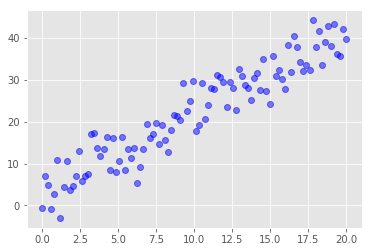

In [7]:
plt.plot(data, target, 'bo', alpha=0.5);

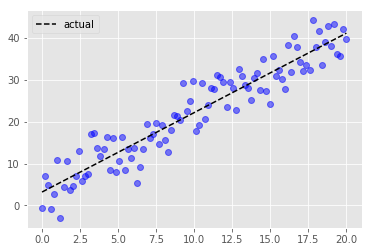

In [8]:
target_no_noise = np.multiply(slope, data)
target_no_noise = np.add(intercept, target_no_noise)
plt.plot(data, target, 'bo', alpha=0.5)
plt.plot(data, target_no_noise, 'k--', label='actual')
plt.legend();

## Fit w/Sklearn

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data.reshape(-1,1), target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
sklearn_intercept = np.round(lr.intercept_, 4)
sklearn_coef = np.round(lr.coef_, 4)[0]
print('intercept: {} | coef: {}'.format(sklearn_intercept, sklearn_coef))

intercept: 3.2458 | coef: 1.9049


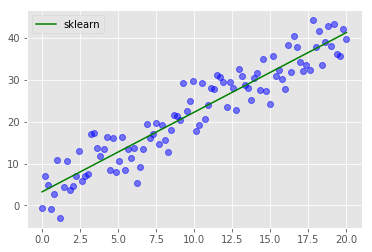

In [11]:
plt.plot(data, target, 'bo', alpha=0.5)
plt.plot(data, lr.predict(data.reshape(-1,1)), 'g', label='sklearn')
plt.legend();

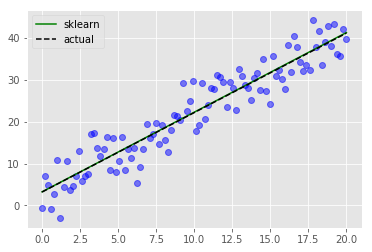

In [12]:
plt.plot(data, target, 'bo', alpha=0.5)
plt.plot(data, lr.predict(data.reshape(-1,1)), 'g', label='sklearn')
plt.plot(data, target_no_noise, 'k--', label='actual')
plt.legend();

## Fit w/Gradient Descent

In [13]:
gd = BatchGradientDescent(learning_rate=0.0001, n_iter=5, seed=2)
gd.fit(data.reshape(-1,1), target, fit_intercept=True)

In [14]:
test_data = np.c_[np.ones(rows), data]
print(test_data[:5])

[[ 1.          0.        ]
 [ 1.          0.2020202 ]
 [ 1.          0.4040404 ]
 [ 1.          0.60606061]
 [ 1.          0.80808081]]


In [15]:
def cost_plot(obj):
    '''plot cost as a function of iteration number'''
    x_axis = np.arange(1, len(obj.cost_)+1)
    plt.plot(x_axis, obj.cost_);
    plt.title('Cost vs Iteration')
    plt.xlabel('Iteration')
    plt.xticks(x_axis)
    plt.ylabel('Cost');

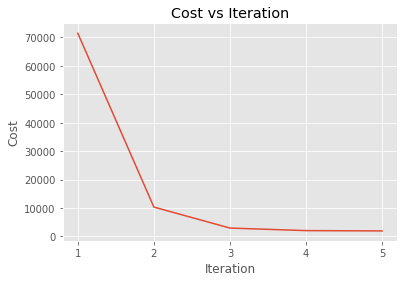

In [16]:
cost_plot(gd)

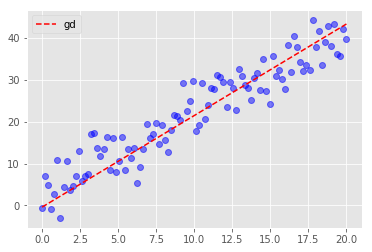

In [17]:
plt.plot(data, target, 'bo', alpha=0.5)
plt.plot(data, gd.predict(test_data), 'r--', label='gd')
plt.legend();

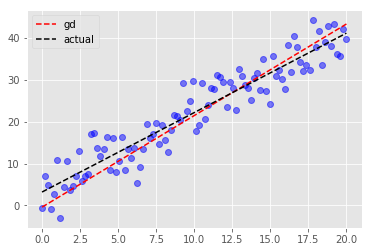

In [18]:
plt.plot(data, target, 'bo', alpha=0.5)
plt.plot(data, gd.predict(test_data), 'r--', label='gd')
plt.plot(data, target_no_noise, 'k--', label='actual')
plt.legend();

## Evolution of $\theta_0$ & $\theta_1$

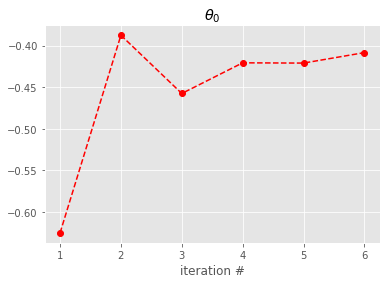

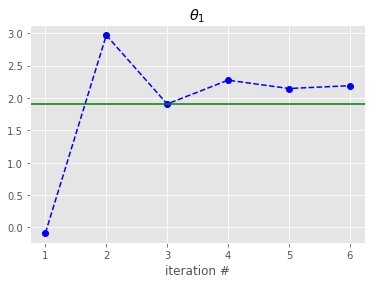

In [19]:
iterations = np.arange(1, len(gd.coefficient_tracker_)+1)

plt.plot(iterations, np.array(gd.coefficient_tracker_)[:,0], 'r--o')
plt.title(r'$\theta_0$')
plt.xlabel('iteration #')

plt.figure()

plt.plot(iterations, np.array(gd.coefficient_tracker_)[:,1], 'b--o')
plt.axhline(y=lr.coef_, color='g')
plt.title(r'$\theta_1$')
plt.xlabel('iteration #');

## Evolution of Model by Iteration

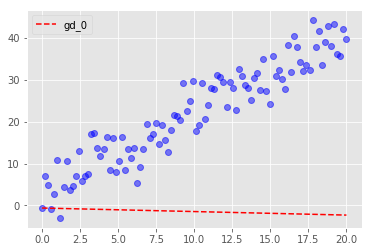

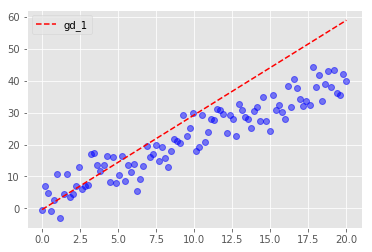

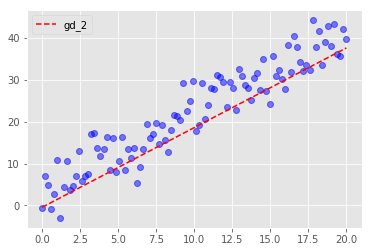

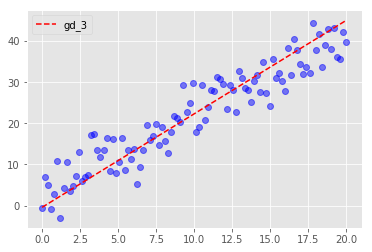

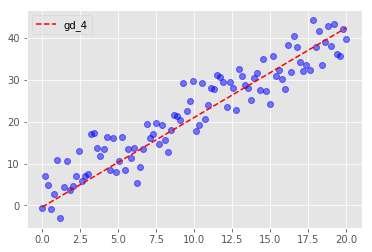

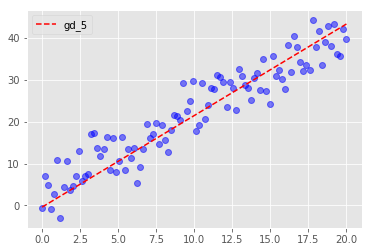

In [20]:
for i, coefficients in enumerate(gd.coefficient_tracker_):
    plt.figure()
    plt.plot(data, target, 'bo', alpha=0.5)
    predictions = np.dot(test_data, coefficients)
    plt.plot(data, predictions, 'r--', label='gd_'+str(i))
    plt.legend()
    #print(predictions)

## Comparison

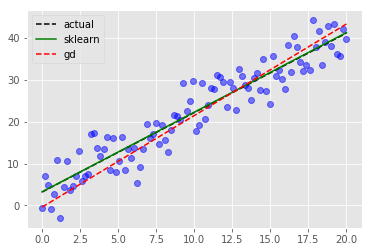

In [21]:
plt.plot(data, target, 'bo', alpha=0.5)
plt.plot(data, target_no_noise, 'k--', label='actual')
plt.plot(data, lr.predict(data.reshape(-1,1)), 'g', label='sklearn')
plt.plot(data, gd.predict(test_data), 'r--', label='gd')
plt.legend();

In [22]:
from sklearn.metrics import mean_squared_error

sklearnGD = round(mean_squared_error(target, lr.predict(data.reshape(-1,1))),3)
myGD = round(mean_squared_error(target, gd.predict(np.c_[np.ones(rows), data])),3)

print(' '*4 + '[Mean Squared Error]')
print('sklearn: {} | gd: {}'.format(sklearnGD, myGD))

    [Mean Squared Error]
sklearn: 15.593 | gd: 19.001
